In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## ケーススタディ
---
データセンターの管理者として、以下の問題を考える。

- サーバーや HDD などの機材が壊れた場合にはすぐに入れ替えたいので、一定数の予備を用意しておきたい
- ただし、予備を過剰に持つのは避けたい
- **何が**わかれば購入すべき機材の数を意思決定できそうか考える

## 数学的確率と統計的確率

### 数学的確率 (場合の数)
---
サイコロを振ったときに起こりうる全ての出来事は以下の通り。全ての目の場合の数 (6通り)を分母に、それぞれの目が出る場合の数 (1通り) を分子に取ると、それぞれの目の出る確率になる。 $
\left({\displaystyle
    1の確率\ =\ 2の確率\ =\ 3の確率\ =\ 4の確率\ =\ 5の確率\ =\ 6の確率\ =\ \frac
        {1}
        {6}
}\right)
$

<table class="border">
    <tr>
        <td>1</td>
        <td>2</td>
        <td>3</td>
    </tr>
    <tr>
        <td>4</td>
        <td>5</td>
        <td>6</td>
    </tr>
</table>


コイン投げで表が裏の2倍出やすいコインを使ったとすると、場合の数は以下の通り。

<table class="border">
    <tr>
        <td>表</td>
        <td>表</td>
        <td>裏</td>
    </tr>
</table>


表全体の面積を1とすると、表に占める面積がそれぞれの出来事の起こる確率 ${\displaystyle \left(表=\frac{2}{3},\ 裏=\frac{1}{3}\right)}$ と考えられる。

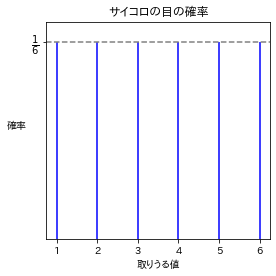

In [2]:
from my_functions.distribution import mathematical_probability
mathematical_probability.show()

### 統計的確率 (観測割合)
---
実際に試行を繰り返して得られた結果の割合から推測される確率。

###### 練習問題

`numpy.random.randint`を用いて、サイコロを10回振ったデータ`dice`(配列) をシミュレーションし、統計的確率のグラフを表示する。

In [3]:
np.random.randint??

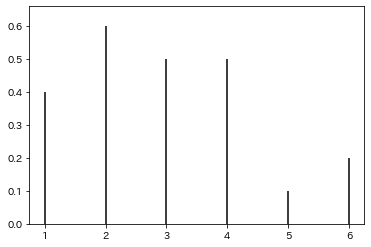

In [4]:
np.random.seed(1234)
dice = np.random.randint(1, 7, 10)
prob = dice / dice.size
plt.vlines(np.arange(1, 7), 0, prob)
plt.ylim((0, prob.max() * 1.1))
plt.show()

### 数学的確率と統計的確率の関係

#### 大数の法則 (law of large numbers)
---
試行回数を増やすにつれ、統計的確率はある値 (期待値 = 数学的確率) に収束していく。これを大数の法則と呼ぶ。

###### 練習問題

表裏が同じ確率で出るコインを1回・2回…1,000回投げ、それぞれで表が出た回数の平均を表すデータ`coin`(配列) を作成し、回数が増えていくにつれて確率 (観測された表の割合) がどのように変化していったかを表す折れ線グラフを表示する。

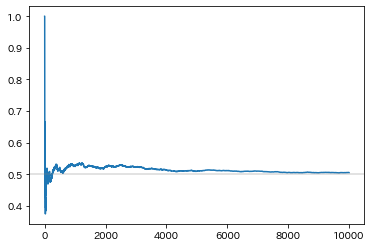

In [5]:
np.random.seed(1234)
size = int(1e4)
data = np.random.randint(low=0, high=2, size=size)
coin = [data[:i + 1].mean() for i in range(size)]
plt.plot(np.arange(size), coin)
plt.axhline(0.5, color='gray', alpha=0.3)
plt.show()

#### 参考

##### モンティ・ホール問題

###### 練習問題

テレビ番組であるゲームを行う。そのゲームとは、3つの扉のうち1つが当たりで、参加者は扉1つを選びその扉が当たりなら豪華景品をもらえるというもの。ただし、参加者が扉を選んだ後に司会者が外れの扉 (参加者が選んだものは除く) を1つ開け、参加者は最初に選んだ扉のままでいるか残った扉に乗り換えるかを選択できる。  
このとき、残った扉に乗り換えた場合の当たりの確率を予想し、場合の数を全て書き出して予想が当たっているかどうか確認する。

<table class="border background-default text-center">
    <tr class="background-dark">
        <th>正解</th>
        <th>最初の選択</th>
        <th>開ける扉</th>
        <th>最終選択</th>
        <th>結果</th>
        <th>場合の数</th>
    </tr>
    <tr>
        <td rowspan="12">1</td>
        <td rowspan="4">1</td>
        <td rowspan="2">2</td>
        <td>そのまま (1)</td>
        <td>あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td>乗り換え (3)</td>
        <td>はずれ</td>
        <td>　</td>
    </tr>
    <tr>
        <td rowspan="2">3</td>
        <td>そのまま (1)</td>
        <td>あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td>乗り換え (2)</td>
        <td>はずれ</td>
        <td>　</td>
    </tr>
    <tr>
        <td rowspan="4">2</td>
        <td rowspan="4">3</td>
        <td rowspan="2">そのまま (2)</td>
        <td rowspan="2">はずれ</td>
        <td>　</td>
    </tr>
    <tr>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td rowspan="2">乗り換え (1)</td>
        <td rowspan="2">あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue"><td>　</td></tr>
    <tr>
        <td rowspan="4">3</td>
        <td rowspan="4">2</td>
        <td rowspan="2">そのまま (3)</td>
        <td rowspan="2">はずれ</td>
        <td>　</td>
    </tr>
    <tr>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td rowspan="2">乗り換え (1)</td>
        <td rowspan="2">あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td>　</td>
    </tr>
    <tr>
        <td rowspan="12">2</td>
        <td rowspan="4">1</td>
        <td rowspan="4">3</td>
        <td rowspan="2">そのまま (1)</td>
        <td rowspan="2">はずれ</td>
        <td>　</td>
    </tr>
    <tr>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td rowspan="2">乗り換え (2)</td>
        <td rowspan="2">あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td>　</td>
    </tr>
    <tr>
        <td rowspan="4">2</td>
        <td rowspan="2">1</td>
        <td>そのまま (2)</td>
        <td>あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td>乗り換え (3)</td>
        <td>はずれ</td>
        <td>　</td>
    </tr>
    <tr>
        <td rowspan="2">3</td>
        <td>そのまま (2)</td>
        <td>あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td>乗り換え (1)</td>
        <td>はずれ</td>
        <td>　</td>
    </tr>
    <tr>
        <td rowspan="4">3</td>
        <td rowspan="4">1</td>
        <td rowspan="2">そのまま (3)</td>
        <td rowspan="2">はずれ</td>
        <td>　</td>
    </tr>
    <tr>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td rowspan="2">乗り換え (2)</td>
        <td rowspan="2">あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td>　</td>
    </tr>
    <tr>
        <td rowspan="12">3</td>
        <td rowspan="4">1</td>
        <td rowspan="4">2</td>
        <td rowspan="2">そのまま (1)</td>
        <td rowspan="2">はずれ</td>
        <td>　</td>
    </tr>
    <tr>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td rowspan="2">乗り換え (3)</td>
        <td rowspan="2">あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td>　</td>
    </tr>
    <tr>
        <td rowspan="4">2</td>
        <td rowspan="4">1</td>
        <td rowspan="2">そのまま (2)</td>
        <td rowspan="2">はずれ</td>
        <td>　</td>
    </tr>
    <tr>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td rowspan="2">乗り換え (3)</td>
        <td rowspan="2">あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td>　</td>
    </tr>
    <tr>
        <td rowspan="4">3</td>
        <td rowspan="2">1</td>
        <td>そのまま (3)</td>
        <td>あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td>乗り換え (2)</td>
        <td>はずれ</td>
        <td>　</td>
    </tr>
    <tr>
        <td rowspan="2">2</td>
        <td>そのまま (3)</td>
        <td>あたり</td>
        <td>　</td>
    </tr>
    <tr class="background-lightblue">
        <td>乗り換え (1)</td>
        <td>はずれ</td>
        <td>　</td>
    </tr>
</table>

乗り換えた場合に当たる確率 $\displaystyle \frac{12}{18} =\frac{2}{3}$

###### 練習問題

上のゲームをプログラムで 10,000 回シミュレーションして、確率を表示する。

In [6]:
total = 10000
success = 0
doors = np.arange(1, 4)
np.random.seed(1234)
for _ in range(total):
    answer = np.random.randint(1, 4)
    choice = np.random.randint(1, 4)
    if answer != choice:
        success += 1
print(f'確率 : {success/total:.2f}')

確率 : 0.66


## 確率分布
---
一定の値を取りうる変数 $X$ があり、 $X$ のそれぞれの値に対応する確率との関係を確率分布という。グラフでは横軸に $X$ の取りうる値を並べ、それに対応する確率を表すものになる。

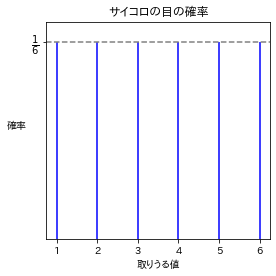

In [7]:
mathematical_probability.show()

### 離散型の確率分布
---
変数 $X$ の取りうる値が離散値 (とびとびの値) の場合、その確率分布は離散型の確率分布という。

以下では実際の現象にそのまま適用できるものを主に扱い、統計量などとともに出てくる特殊な分布はその都度扱う。

###### 練習問題

サイコロを 10,000 回振ったデータ`dice10000`をシミュレーションし、確率分布をグラフで表現する。

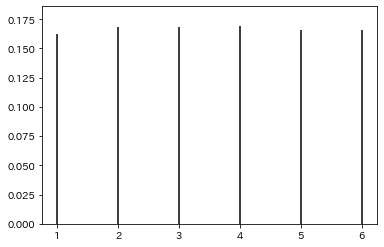

In [8]:
np.random.seed(1234)
size = int(1e4)
events = np.arange(1, 7)
dice10000 = np.random.randint(events[0], events[-1] + 1, size)
probs = [np.sum(dice10000 == i) / size for i in events]
plt.vlines(events, 0, probs)
plt.ylim((0, max(probs) * 1.1))
plt.show()

離散型の確率分布では、縦軸に取りうる値に対応する割合をとり、その長さで確率を表す。

#### 離散一様分布 (discrete uniform distribution)
---
> サイコロのように取りうる値のそれぞれに同じ確率が割り当てられている確率分布を離散一様分布という。

In [9]:
from my_functions.distribution import discrete_uniform
discrete_uniform.show()

interactive(children=(IntRangeSlider(value=(1, 6), continuous_update=False, description='$事象の範囲$：', max=10, mi…

#### ベルヌーイ分布 (bernoulli distribution)

###### 練習問題

表が $60\%$ の確率で出るコインで 1,000 回コイントスを行った結果をシミュレーションし、確率分布をグラフで表現する。

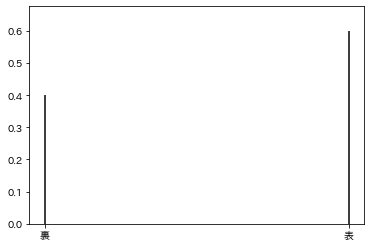

In [10]:
np.random.seed(1234)
events = ['裏', '表']
size = 1000
p = 0.6
data = np.random.choice(events, size, p=[1 - p, p])
probs = [np.sum(data == e) / size for e in events]
plt.vlines(events, 0, prob)
plt.xticks(events)
plt.ylim((0, max(probs) * 1.1))
plt.show()

> コイントスのように成功 (1) と失敗 (0) の二者択一 (ベルヌーイ試行) の結果の確率分布をベルヌーイ分布という。

In [11]:
from my_functions.distribution import bernoulli
bernoulli.show()

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='成功確率：', max=1.0, readout_fo…

#### 二項分布 (binomial distribution)

###### 練習問題

偏りのないコインでコイントスを 10 回中の成功数を記録する。これを 10,000 回繰り返した結果をシミュレーションし、確率分布をグラフで表現する。 (10 回投げて記録する×10,000 回 = 合計 100,000 回投げる)

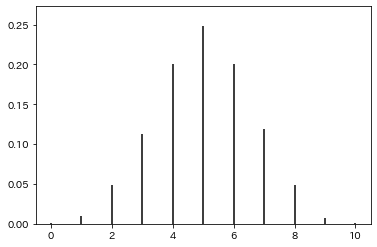

In [12]:
np.random.seed(1234)
reputation = 10
sample = int(1e4)
events = np.arange(0, 11)
data = np.random.randint(0, 2, (sample, reputation)).sum(axis=1)
probs = [np.sum(data == e) / sample for e in events]
plt.vlines(events, 0, probs)
plt.ylim((0, max(probs) * 1.1))
plt.show()

> コイントスのようなベルヌーイ試行を $n$ 回行ったときの成功数の確率分布を二項分布という。

In [13]:
from my_functions.distribution import binomial
binomial.show()

interactive(children=(IntSlider(value=3, continuous_update=False, description='回数：', max=10, min=1), FloatSlid…

#### ポアソン分布 (poisson distribution)
---
> 起きる確率が稀な事象を表す確率分布をポアソン分布という。東京都内の1日あたり交通事故死者数など、 $n$ が大きく $p$ が小さい (期待値 $\mu =np$ が小さい) ときの二項分布の近似。 (二項分布は $n$ が大きいと $p^{x}( 1-p)^{n-x}$ を求めないといけない都合上計算が大変で、近似できると便利なため)

In [14]:
from my_functions.distribution import poisson
poisson.show()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='期待値 (平均) $( p\\times n)$：',…

#### *幾何分布 (geometric distribution)*

###### 練習問題

偏りのないコインでコイントスを行い、初めて表が出たときの試行回数を記録する。これを 10,000 回繰り返した結果をシミュレーションし、1~10 の範囲での確率分布をグラフで表現する。 (試行回数は10で打ち切ってよい)

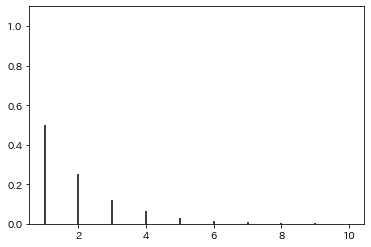

In [15]:
reputation = 10
sample = int(1e4)
events = ['裏', '表']
data = np.full((sample, reputation + 1), '表')
data[:, :reputation] = np.random.choice(events, size=(sample, reputation))
first = np.argsort(data != '表', kind='mergesort')[:, 0] + 1
x = np.arange(1, 11)
probs = [np.sum(first == i) / sample for i in x]
plt.vlines(x, 0, probs)
plt.ylim((0, 1.1))
plt.show()

> ベルヌーイ試行で、初めて成功するまでの回数を表す確率分布を幾何分布という。ある出来事が起きてから、次に同じことが起きるまでの期間を求める。

In [16]:
from my_functions.distribution import geometric
geometric.show()

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='確率／回', max=1.0, min=0.1, re…

### 連続型の確率分布
---
変数 $X$ の取りうる値が連続値 (実数) の場合、その確率分布は連続型の確率分布という。

以下では実際の現象にそのまま適用できるものを主に扱い、統計量などとともに出てくる特殊な分布はその都度扱う。

###### 練習問題

`numpy.random.rand`と`numpy.unique`を用いて、 10,000 個の乱数 (0~1 の範囲の実数) を作成し、その中の重複する値の数を求める。

In [17]:
np.random.rand??

In [18]:
np.unique??

In [19]:
np.random.seed(1234)
size = int(1e4)
data = np.random.rand(size)
print(f'重複数 : {size-np.unique(data).size}')

重複数 : 0


###### 練習問題

上で作成したデータを離散化し、それぞれの階級に含まれるカウント数を元に棒グラフでヒストグラムを自作する。ただし、棒と棒の間の間隔を開けず、棒の面積の合計が1になるように高さを調整する。

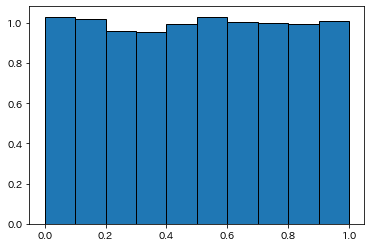

In [20]:
np.random.seed(1234)
xmin, xmax = 0, 1
size = int(1e4)
data = np.random.rand(size)
bins = 10
division = np.linspace(0, 1, bins + 1)
counts = [
    np.sum((division[i] <= data) & (data < division[i + 1]))
    for i in range(bins)
]
width = (xmax - xmin) / bins
height = [1 / width / sample * count for count in counts]
plt.bar(division[:-1], height, width, align='edge', edgecolor='black')
plt.show()

連続値のとりうる値の種類は無限に存在するので、場合の数で考えるとある値 $x$ に対応する**確率は $0$** $
{\displaystyle \left(
    \frac
        {1}
        {\infty }
    \rightarrow 0
\right)}
$ となる。そこで、上のヒストグラムのように一定区間の面積で確率を表す。  
このとき縦軸は確率密度になる。面積 $\displaystyle 1m^{2}$ あたりの質量、つまり密度が $\displaystyle kg/m^{2}$ であるように、確率密度は $\displaystyle 確率/変数Xの単位$ である。

#### 一様分布 (uniform distribution)
---
> 離散一様分布のように最小値 $a$ と最大値 $b$ の間で、同じ長さの区間の確率がどこを取っても等しいような連続値の確率分布を一様分布という。

In [21]:
from my_functions.distribution import uniform
uniform.show()

interactive(children=(FloatRangeSlider(value=(0.0, 5.0), continuous_update=False, description='事象の範囲：', max=10…

#### 指数分布 (exponential distribution)
---
> 幾何分布のようにベルヌーイ試行で、初めて成功するまでを表す確率分布を指数分布という。幾何分布が離散時間 (回数など) を表すのに対して、指数分布は連続時間 (通常の時間など) を表す。

In [22]:
from my_functions.distribution import exponential
exponential.show()

interactive(children=(FloatLogSlider(value=0.5, continuous_update=False, description='単位時間あたり平均回数：', max=1.0, …

#### 正規分布 (normal distribution)
---
> 色々な現象に対してよく現れる左右対称な山型の連続確率分布。 $-\infty $ から $\infty $ まで全ての実数に対して確率 (密度) を割り当てる。  
他の確率分布を近似するのに用いられることもある。

In [23]:
from my_functions.distribution import normal
normal.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='平均：', max=1.0, min=-1.0, re…

### 確率分布まとめ
---
<table class="text-center border">
    <tr class="background-dark">
        <th>名称</th>
        <th>離散・連続</th>
        <th>特徴</th>
    </tr>
    <tr class="background-bright">
        <td>離散一様分布</td>
        <td class="text-red">離散</td>
        <td rowspan="2">確率一定</td>
    </tr>
    <tr class="background-bright">
        <td>一様分布</td>
        <td class="text-blue">連続</td>
    </tr>
    <tr class="background-dark">
        <td>ベルヌーイ分布</td>
        <td class="text-red">離散</td>
        <td rowspan="5">ベルヌーイ試行を対象</td>
    </tr>
    <tr class="background-dark">
        <td>二項分布</td>
        <td class="text-red">離散</td>
    </tr>
    <tr class="background-dark">
        <td>ポアソン分布</td>
        <td class="text-red">離散</td>
    </tr>
    <tr class="background-dark">
        <td>幾何分布</td>
        <td class="text-red">離散</td>
    </tr>
    <tr class="background-dark">
        <td>指数分布</td>
        <td class="text-blue">連続</td>
    </tr>
    <tr class="background-bright">
        <td>正規分布</td>
        <td class="text-blue">連続</td>
        <td>左右対称の山型</td>
    </tr>
</table>

<table class="border background-bright">
    <tr class="background-dark text-center">
        <th colspan="3">ベルヌーイ試行に関連する分布間の関係</th>
        <th>分布</th>
    </tr>
    <tr>
        <td class="border-right-none text-left">ベルヌーイ試行を複数回</td>
        <td class="border-left-none" colspan="2"></td>
        <td class="text-center">二項分布</td>
    </tr>
    <tr>
        <td class="text-left" rowspan="2">回数が多いときの二項分布の近似</td>
        <td class="border-right-none text-left">期待値 $\displaystyle ( \mu =np)$ が小さい</td>
        <td class="border-left-none"></td>
        <td class="text-center">ポアソン分布</td>
    </tr>
    <tr>
        <td class="border-right-none text-left">期待値 $\displaystyle ( \mu =np)$ が大きい</td>
        <td class="border-left-none"></td>
        <td class="text-center">正規分布</td>
    </tr>
    <tr>
        <td class="text-left" rowspan="4">ベルヌーイ試行の時間と回数の関係</td>
        <td class="text-left" rowspan="2">一定時間内の回数</td>
        <td class="text-left">離散時間</td>
        <td class="text-center">二項分布</td>
    </tr>
    <tr>
        <td class="text-left">連続時間</td>
        <td class="text-center">ポアソン分布</td>
    </tr>
    <tr>
        <td class="text-left" rowspan="2">初めて成功するまでの時間</td>
        <td class="text-left">離散時間</td>
        <td class="text-center">幾何分布</td>
    </tr>
    <tr>
        <td class="text-left">連続時間</td>
        <td class="text-center">指数分布</td>
    </tr>
</table>

## 確率分布に関連する関数
---
`scipy.stats` の中に、それぞれの確率分布に対応するクラスがある。

<table class="text-center border">
    <tr>
        <th>確率分布</th>
        <th>クラス</th>
    </tr>
    <tr>
        <td>一様分布</td>
        <td class="text-left"><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html">scipy.stats.uniform</a></td>
    </tr>
    <tr>
        <td>ベルヌーイ分布</td>
        <td class="text-left"><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html">scipy.stats.bernoulli</a></td>
    </tr>
    <tr>
        <td>二項分布</td>
        <td class="text-left"><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html">scipy.stats.binom</a></td>
    </tr>
    <tr>
        <td>ポアソン分布</td>
        <td class="text-left"><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html">scipy.stats.poisson</a></td>
    </tr>
    <tr>
        <td>幾何分布</td>
        <td class="text-left"><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html">scipy.stats.geom</a></td>
    </tr>
    <tr>
        <td>指数分布</td>
        <td class="text-left"><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html">scipy.stats.expon</a></td>
    </tr>
    <tr>
        <td>正規分布</td>
        <td class="text-left"><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html">scipy.stats.norm</a></td>
    </tr>
</table>

他にも様々な[離散型](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions)・[連続型](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)の確率分布がある。

これらのクラスはほとんど共通するメソッドを持つので、以下では各メソッドを見ていく。

### 確率質量関数 (pmf, Probability Mass Function)
---
> 離散型の分布で、ある **$X$ に対応する確率**を求める関数。

###### 練習問題

`scipy.stats.binom.pmf`を用いて、二項分布の確率質量関数を表すグラフを表示し、これと二項分布をシミュレーション (二項分布からサンプリング) した結果を重ねて比較する。

In [24]:
stats.binom??

In [25]:
stats.binom.pmf??

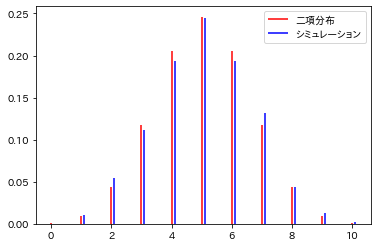

In [26]:
np.random.seed(1234)
n = 10
p = 0.5
sample = int(1e3)
x = np.arange(n + 1)
probs = stats.binom.pmf(x, n=n, p=p)
data = np.random.binomial(n, p, sample)
simulation = [np.sum(data == i) / sample for i in x]
plt.vlines(x, 0, probs, color='red', label='二項分布')
plt.vlines(x + 0.1, 0, simulation, color='blue', label='シミュレーション')
plt.legend()
plt.ylim((0, plt.ylim()[1]))
plt.show()

###### 練習問題

$\displaystyle n=1,000,\ p=0.001$ として、二項分布とポアソン分布の確率質量関数のグラフを並べて比較する。

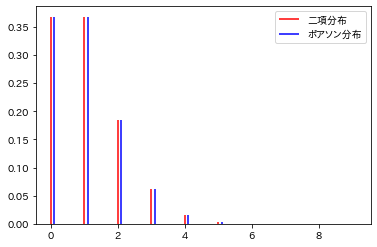

In [27]:
n = int(1e3)
p = 1e-3
mu = n * p
x = np.arange(10)
binomial = stats.binom.pmf(x, n=n, p=p)
poisson = stats.poisson.pmf(x, mu=mu)
plt.vlines(x, 0, binomial, color='red', label='二項分布')
plt.vlines(x + 0.1, 0, poisson, color='blue', label='ポアソン分布')
plt.legend()
plt.ylim((0, plt.ylim()[1]))
plt.show()

### 確率密度関数 (pdf, Probability Density Function)
---
> 連続型の分布で、ある **$X$ に対応する確率密度**を求める関数。

###### 練習問題

`scipy.stats.expon.pdf`を用いて、指数分布の確率密度関数を表すグラフを表示 (`matplotlib.pyplot.plot`または`matplotlib.pyplot.fill_between`を使用) し、これを`numpy.random.exponential`を用いて指数分布からサンプリングした結果 (面積が1になるように正規化されたヒストグラム) を重ねて比較する。

In [28]:
stats.expon??

In [29]:
stats.expon.pdf??

In [30]:
np.random.exponential??

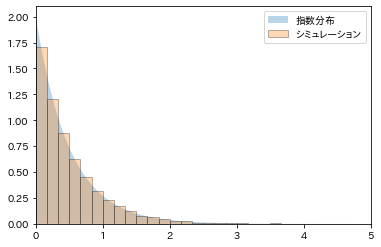

In [31]:
np.random.seed(1234)
scale = 0.5
sample = int(1e4)
x = np.linspace(0, 5, 200)
xmin, xmax = x.min(), x.max()
density = stats.expon.pdf(x, scale=scale)
data = np.random.exponential(scale, size=sample)
bins = 30
division = np.linspace(xmin, xmax, bins + 1)
counts = [
    np.sum((division[i] <= data) & (data < division[i + 1]))
    for i in range(bins)
]
width = (xmax - xmin) / bins
height = [1 / width / sample * count for count in counts]
plt.fill_between(x, density, alpha=0.3, label='指数分布')
plt.bar(
    division[:-1],
    height,
    width,
    align='edge',
    edgecolor='black',
    alpha=0.3,
    label='シミュレーション')
plt.xlim((x.min(), x.max()))
plt.legend()
plt.show()

###### 練習問題

平均 0 ・標準偏差 1 の正規分布 (標準正規分布) の確率密度関数を表すグラフを表示する。

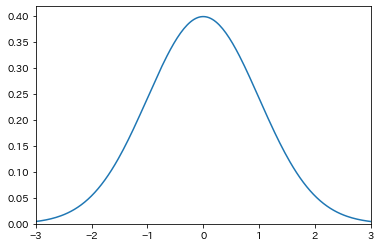

In [32]:
x = np.linspace(-3, 3, 200)
dens = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, dens)
plt.xlim((x.min(), x.max()))
plt.ylim((0, plt.ylim()[1]))
plt.show()

### 累積分布関数 (cdf, Cumulative Distribution Function)

###### 練習問題

指数分布からサンプリングし、離散化して棒グラフで表示する。ただし、各階級がそれ以下の階級の合計値になっている累積積み上げ棒グラフを用いる。

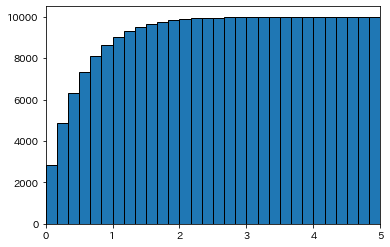

In [33]:
np.random.seed(1234)
scale = 0.5
sample = int(1e4)
data = np.random.exponential(scale, size=sample)
bins = 30
xmin, xmax = 0, 5
division = np.linspace(xmin, xmax, bins + 1)
counts = [
    np.sum((division[i] <= data) & (data < division[i + 1]))
    for i in range(bins)
]
width = (xmax - xmin) / bins
cumulation = [sum(counts[:i + 1]) for i in range(bins)]
plt.bar(division[:-1], cumulation, width, align='edge', edgecolor='black')
plt.xlim((xmin, xmax))
plt.show()

###### 練習問題

上のグラフを全体の合計が1になるように正規化する。

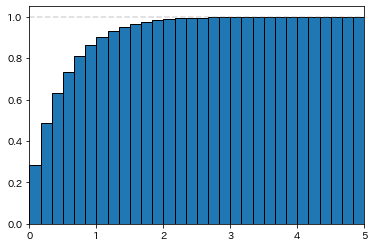

In [34]:
np.random.seed(1234)
scale = 0.5
sample = int(1e4)
data = np.random.exponential(scale, size=sample)
bins = 30
xmin, xmax = 0, 5
division = np.linspace(xmin, xmax, bins + 1)
counts = [
    np.sum((division[i] <= data) & (data < division[i + 1]))
    for i in range(bins)
]
width = (xmax - xmin) / bins
cumulation = [sum(counts[:i + 1]) / sample for i in range(bins)]
plt.bar(division[:-1], cumulation, width, align='edge', edgecolor='black')
plt.axhline(1, color='gray', linestyle='dashed', alpha=0.3)
plt.xlim((xmin, xmax))
plt.show()

> 取りうる**値の下限から $X$ までの確率の合計**を表す関数を累積分布関数という。

In [35]:
from my_functions.distribution import methods
methods.cdf()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='入力：', max=3.0, min=-3.0, re…

###### 練習問題

震度 7 の地震が年平均 0.2 回起きることがわかっているとして、今後 5 年以内に震度 7 の地震が起きる確率を求める。

In [36]:
lambda_ = 0.2
print(f'5年以内に震度7の地震が起きる確率 : {stats.expon.cdf(5, scale=1/lambda_):.3f}')

5年以内に震度7の地震が起きる確率 : 0.632


### 生存関数 (sf, Survival Function)

###### 練習問題

正規分布からサンプリングし、離散化して棒グラフで表示する。ただし、各階級がそれ以上の階級の合計値になるようにする。

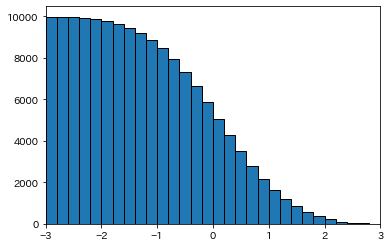

In [37]:
np.random.seed(1234)
mu = 0
sigma = 1
sample = int(1e4)
data = np.random.normal(mu, sigma, size=sample)
bins = 30
xmin, xmax = mu - sigma * 3, mu + sigma * 3
division = np.linspace(xmin, xmax, bins + 1)
counts = [
    np.sum((division[i] <= data) & (data < division[i + 1]))
    for i in range(bins)
]
width = (xmax - xmin) / bins
cumulation = [sum(counts[i:]) for i in range(bins)]
plt.bar(division[:-1], cumulation, width, align='edge', edgecolor='black')
plt.xlim((xmin, xmax))
plt.show()

###### 練習問題

上のグラフを全体の合計が1になるように正規化する。

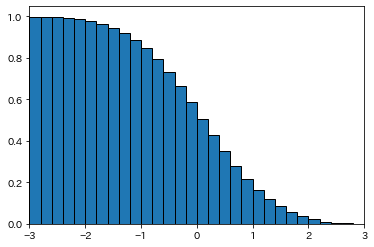

In [38]:
np.random.seed(1234)
mu = 0
sigma = 1
sample = int(1e4)
data = np.random.normal(mu, sigma, size=sample)
bins = 30
xmin, xmax = mu - sigma * 3, mu + sigma * 3
division = np.linspace(xmin, xmax, bins + 1)
counts = [
    np.sum((division[i] <= data) & (data < division[i + 1]))
    for i in range(bins)
]
width = (xmax - xmin) / bins
cumulation = [sum(counts[i:]) / sample for i in range(bins)]
plt.bar(division[:-1], cumulation, width, align='edge', edgecolor='black')
plt.xlim((xmin, xmax))
plt.show()

> 取りうる**値の上限から  𝑋  までの確率の合計**を表す関数を生存関数という。

In [39]:
methods.sf()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='入力：', max=3.0, min=-3.0, re…

###### 練習問題

指数分布の`生存関数`と`1-累積分布関数`を重ねて表示し、比較する。

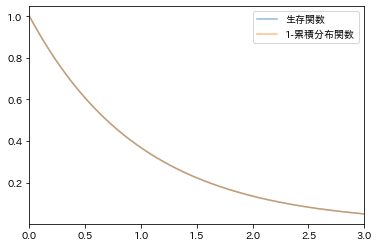

In [40]:
xmax = 3
x = np.linspace(0, xmax, 200)
expon = stats.expon()
sf = expon.sf(x)
cdf = expon.cdf(x)
plt.plot(x, sf, alpha=0.5, label='生存関数')
plt.plot(x, 1 - cdf, alpha=0.5, label='1-累積分布関数')
plt.legend()
plt.xlim((0, xmax))
plt.show()

### パーセント点 (ppf, Percent Point Function)

###### 練習問題

指数分布からサンプリングし、 $0\% \sim 100\%$ まで $1\%$ 刻みで分位点を求め、横軸に分位点、縦軸に $\%$ の値をとった散布図を表示する。

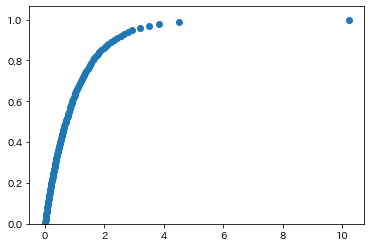

In [41]:
np.random.seed(1234)
sample = int(1e4)
data = np.random.exponential(size=sample)
step = 0.01
quantile = np.arange(0, 1 + step, step)
x = np.quantile(data, quantile)
plt.scatter(x, quantile)
plt.ylim((0, plt.ylim()[1]))
plt.show()

> ある累積確率に対応する $X$ をパーセント点という。パーセント点を求める関数は、**累積分布関数の逆関数**になっている。

In [42]:
methods.ppf()

interactive(children=(FloatSlider(value=0.55, continuous_update=False, description='入力：', max=0.95, min=0.05, …

###### 練習問題

指数分布からサンプリングし、 $0\% \sim 100\%$ まで $1\%$ 刻みで分位点を求め、横軸に分位点、縦軸に $\%$ の値をとった散布図と指数分布の累積分布関数を重ねて表示し、比較する。

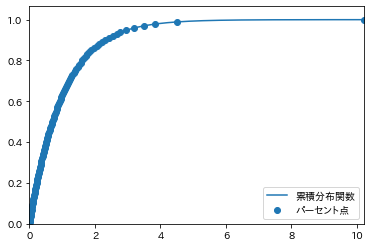

In [43]:
np.random.seed(1234)
sample = int(1e4)
scale = 1.0
data = np.random.exponential(scale, size=sample)
step = 0.01
quantile = np.arange(0, 1 + step, step)
ppt = np.quantile(data, quantile)
xmax = ppt.max()
x = np.linspace(0, xmax, 200)
cdf = stats.expon.cdf(x, scale=scale)
plt.scatter(ppt, quantile, label='パーセント点')
plt.plot(x, cdf, label='累積分布関数')
plt.legend()
plt.xlim((0, xmax))
plt.ylim((0, plt.ylim()[1]))
plt.show()

### 逆生存関数 (isf, Inverse Survival Function)

###### 練習問題

正規分布からサンプリングし、 $0\% \sim 100\%$ まで $1\%$ 刻みで分位点を求め、横軸に分位点、縦軸に $\left( 100-p\right) \%$ の値をとった散布図を表示する。

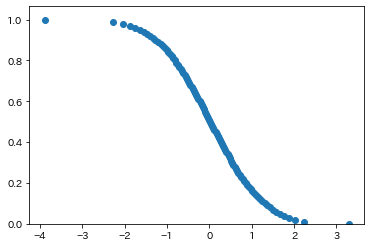

In [44]:
np.random.seed(1234)
sample = int(1e4)
data = np.random.normal(size=sample)
step = 0.01
quantile = np.arange(0, 1 + step, step)
x = np.quantile(data, 1-quantile)
plt.scatter(x, quantile)
plt.ylim((0, plt.ylim()[1]))
plt.show()

> ある生存確率に対応する $X$ を求める関数を逆生存関数という。逆生存関数は生存関数の逆関数になっている。  
**教科書等では逆生存関数の出力をパーセント点と呼ぶ**ことが多い。

In [45]:
methods.isf()

interactive(children=(FloatSlider(value=0.55, continuous_update=False, description='入力：', max=0.95, min=0.05, …

###### 練習問題

正規分布からサンプリングし、 $0\% \sim 100\%$ まで $1\%$ 刻みで分位点を求め、横軸に分位点、縦軸に $\left( 100-p\right) \%$ の値をとった散布図と正規分布の生存関数を重ねて表示し、比較する。

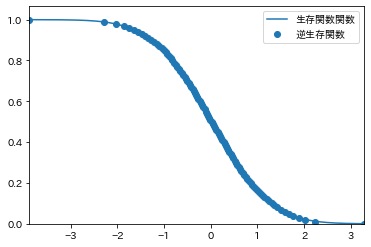

In [46]:
np.random.seed(1234)
sample = int(1e4)
mean = 0
sigma = 1.0
data = np.random.normal(mean, sigma, size=sample)
step = 0.01
quantile = np.arange(0, 1 + step, step)
isf = np.quantile(data, 1-quantile)
xmin = isf.min()
xmax = isf.max()
x = np.linspace(xmin, xmax, 200)
sf = stats.norm.sf(x, loc=mean, scale=sigma)
plt.scatter(isf, quantile, label='逆生存関数')
plt.plot(x, sf, label='生存関数関数')
plt.legend()
plt.xlim((xmin, xmax))
plt.ylim((0, plt.ylim()[1]))
plt.show()

## 正規分布の性質

###### 練習問題

二項分布と正規分布の質量関数・密度関数を重ねて表示し、比較する。

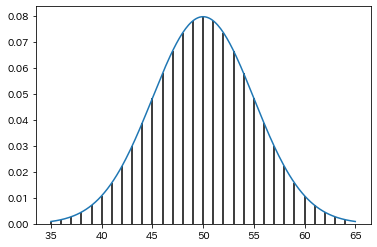

In [47]:
n = 100
p = 0.5
binom = stats.binom(n=n, p=p)
mu = binom.mean()
sigma = binom.std()
norm = stats.norm(loc=mu, scale=sigma)
xmin = mu-sigma*3
xmax = mu+sigma*3
division = np.arange(xmin, xmax)
x = np.linspace(xmin, xmax, 200)
p_binom = binom.pmf(division)
p_norm = norm.pdf(x)
plt.vlines(division, 0, p_binom)
plt.plot(x, p_norm)
plt.ylim((0, plt.ylim()[1]))
plt.show()

###### 練習問題

平均 $0$ ・分散 $\sigma ^{2}$ (標準偏差 $\sigma$) の正規分布 $\displaystyle N\left( 0 ,\sigma ^{2}\right)$ で $-\sigma \sim \sigma, -2\sigma \sim 2\sigma, -3\sigma \sim 3\sigma$ の範囲に含まれる確率をそれぞれ求める。

In [48]:
mu = 0
sigma = 1
norm = stats.norm(loc=mu, scale=sigma)
for i in range(3):
    print(f'{i + 1}シグマ範囲の確率 : {1 - norm.cdf(mu - (i + 1) * sigma) * 2:.3f}')

1シグマ範囲の確率 : 0.683
2シグマ範囲の確率 : 0.954
3シグマ範囲の確率 : 0.997


###### 練習問題

標準正規分布 $\displaystyle N( 0,1)$ について以下の値を求める。

- 上側 $5\%$ 点 (上側確率 $5\%$ になるような $X$)
- 両側 $5\%$ 点 (上側確率 $2.5\%$ ・下側確率 $2.5\%$ になるようなそれぞれの $X$)
- 上側 $1\%$ 点 (上側確率 $1\%$ になるような $X$)
- 両側 $1\%$ 点 (上側確率 $0.5\%$ ・下側確率 $0.5\%$ になるようなそれぞれの $X$)

In [49]:
for p in [0.05, 0.01]:
    for side in ['上側', '両側']:
        head = f'{side}{int(100 * p)}%点 : '
        pp = [p] if side is '上側' else [1 - p / 2, p / 2]
        tail = ', '.join([f'{stats.norm.isf(i):.2f}' for i in pp])
        print(head, tail)

上側5%点 :  -1.96, 1.96
両側5%点 :  -1.96, 1.96
上側1%点 :  -2.58, 2.58
両側1%点 :  -2.58, 2.58
